# Análise do naufrágio do Titanic

## Contexto

   > O RMS Titanic foi um navio de passageiros britânico operado pela White Star Line e construído pelos estaleiros da Harland and Wolff, em Belfast. Segunda embarcação da Classe Olympic de transatlânticos, depois do RMS Olympic e seguido pelo HMHS Britannic, foi projetado pelos engenheiros navais Alexander Carlisle e Thomas Andrews. Sua construção começou em março de **1909** e seu lançamento ao mar ocorreu em maio de **1911**. O Titanic foi pensado para ser o navio mais luxuoso e mais seguro de sua época, gerando lendas que era supostamente **"inafundável"**.  
   > A embarcação partiu em sua viagem inaugural de **Southampton** com destino a Nova Iorque em 10 de abril de 1912, no caminho passando em **Cherbourg-Octeville**, na França, e por **Queenstown**, na Irlanda. Colidiu com um iceberg na proa dianteira do lado direito **às 23h40 de 14 de abril**, naufragando na madrugada do dia seguinte, com **mais de 1 500 pessoas a bordo**, sendo um dos maiores desastres marítimos em tempos de paz de toda a história. Seu naufrágio destacou vários pontos fracos do projeto, deficiências nos procedimentos de evacuação de emergência e falhas nas regulamentações marítimas. Comissões de inquérito foram instauradas nos Estados Unidos e no Reino Unido, acarretando mudanças nas leis internacionais de navegação, que permanecem em vigor mais de um século depois.  
   Os destroços do Titanic foram procurados por décadas até serem **encontrados, em 1985, por uma equipe liderada por Robert Ballard**. Ele se encontra a **3 843 metros de profundidade e a 650 quilômetros ao sudeste de Terra Nova, no Canadá**. Sua história e naufrágio permanecem no imaginário popular, levando à produção de vários livros e filmes a seu respeito, mais notavelmente o filme Titanic, de 1997.  
   Até hoje é um dos navios mais famosos da história, com seus destroços atraindo várias expedições de exploração ao longo dos anos.

In [1]:
#funcoes basicas para os graficos

def autolabel(rects,ax, df): #autolabel
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{} ({:.2f}%)'.format(height, height*100/df.shape[0]),
                    xy = (rect.get_x() + rect.get_width()/2, height),
                    xytext= (0,3),
                    textcoords="offset points",
                    ha='center', va='bottom')
def autolabel_without_pct(rects,ax, df): #autolabel
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy = (rect.get_x() + rect.get_width()/2, height+5),
                    xytext= (0,3),
                    textcoords="offset points",
                    ha='center', va='bottom')
def autolabel_horizontal(rects,ax):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        width = rect.get_width()
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_y() + rect.get_height()/2.,
                '%.2f' % width,
                ha='center', va='center', color='black')    

## 01. Importanto Dataset e bibliotecas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set(style='white', palette='deep')
width = 0.35


In [3]:
df = pd.read_excel('titanic3.xls')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
classificacao_colunas = pd.read_excel('classificacao_colunas.xls')
classificacao_colunas

,Nome da coluna,Definição,Valores
0,pclass,Classe do Tiquete,"1 = 1st, 2 = 2nd, 3 = 3rd"
1,survived,Sobreviveu,"0 = No, 1 = Sí"
2,Name,Nome,Nombre
3,sex,Genero,"male = Masc, female = Fem"
4,age,Idade em anos,Número
5,sibsp,Quantidade de irmãos a bordo,Número
6,parch,Quantidade de parentes a bordo,Número
7,ticket,Número de tiquete,Número
8,fare,Custo do tiquete,Número
9,cabin,Numero da cabine,Número


In [5]:
#ajustando nomes das colunas para PT-BR

df.columns = ['Classe do Tiquete', 'Sobreviveu', 'Nome','Genero','Idade_em_anos','Quantidade_de_irmãos_a_bordo','Quantidade_de_parentes_a_bordo',
              'Número_do_tiquete','Custo_do_tiquete','Numero_da_cabine', 'Porto_de_embarque', 'Bote', 'Numero_do_corpo', 'Cidade_de_destino']
df.head()

,Classe do Tiquete,Sobreviveu,Nome,Genero,Idade_em_anos,Quantidade_de_irmãos_a_bordo,Quantidade_de_parentes_a_bordo,Número_do_tiquete,Custo_do_tiquete,Numero_da_cabine,Porto_de_embarque,Bote,Numero_do_corpo,Cidade_de_destino
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## 02. Limpeza e analise exploratória dos dados

In [6]:
survived = df[df['Sobreviveu']==1]
not_survided = df[df['Sobreviveu']==0]
total_passenger = len(df.Sobreviveu)
print('Qual o percetual de sobreviventes?')
print('-'*100)
print('Percetual de sobreviventes: {:.2f}%'.format((len(survived)/total_passenger)*100))
print('Percetual de mortos: {:.2f}%'.format((len(not_survided)/total_passenger)*100))

Qual o percetual de sobreviventes?
----------------------------------------------------------------------------------------------------
Percetual de sobreviventes: 38.20%
Percetual de mortos: 61.80%


In [7]:
#calculando a quantidade de pessoasl embarcadas por porto
print('Quantas pessoas embarcaram em Cherbourg, Queenstown, and Southampton ?')
print('-'*100)
print('- {} pessoas embarcaram em Cherbourg'.format(len(df[df['Porto_de_embarque']=='C'])))
print('- {} pessoas embarcaram em Queenstown'.format(len(df[df['Porto_de_embarque']=='Q'])))
print('- {} pessoas embarcaram em Southampton'.format(len(df[df['Porto_de_embarque']=='S'])))

Quantas pessoas embarcaram em Cherbourg, Queenstown, and Southampton ?
----------------------------------------------------------------------------------------------------
- 270 pessoas embarcaram em Cherbourg
- 125 pessoas embarcaram em Queenstown
- 914 pessoas embarcaram em Southampton


In [8]:
max_name = np.array([])
min_name = np.array([])
max_name_value = np.array([])
min_name_value = np.array([])
n=0
for i in df.loc[:,['Idade_em_anos','Custo_do_tiquete']]:
    max_name = np.append(max_name, df['Nome'][df[i].idxmax()])
    max_name_value = np.append(max_name_value, max(df[i]))
    min_name = np.append(min_name, df['Nome'][df[i].idxmin()])
    min_name_value = np.append(min_name_value, min(df[i]))
    print('A pessoa com máximo de {} foi {} com {}'.format(i, max_name[n],max_name_value[n]))
    print('A pessoa com mínimo de {} foi {} com {}'.format(i,min_name[n],min_name_value[n]))
    print('-'*100)
    n=+1

woman = df[df['Genero']=='female'].dropna(axis=1)
men = df[df['Genero']=='male'].dropna(axis=1)
print('Quantas mulheres haviam embarcadas?')
print('Total de mulheres embarcadas: {}'.format(len(woman)))
print('-'*100)
print('Quantos homens haviam embarcadas?')
print('Total de homens embarcados: {}'.format(len(men)))

A pessoa com máximo de Idade_em_anos foi Barkworth, Mr. Algernon Henry Wilson com 80.0
A pessoa com mínimo de Idade_em_anos foi Dean, Miss. Elizabeth Gladys "Millvina" com 0.1667
----------------------------------------------------------------------------------------------------
A pessoa com máximo de Custo_do_tiquete foi Cardeza, Mr. Thomas Drake Martinez com 512.3292
A pessoa com mínimo de Custo_do_tiquete foi Andrews, Mr. Thomas Jr com 0.0
----------------------------------------------------------------------------------------------------
Quantas mulheres haviam embarcadas?
Total de mulheres embarcadas: 466
----------------------------------------------------------------------------------------------------
Quantos homens haviam embarcadas?
Total de homens embarcados: 843


In [9]:
#corpos encontrados
print('-'*100)
print("Quantos corpos foram encontrados?")
print('O Total de mortos foi {}. Mas, somente {} corpos foram encontrados.'.format(len(not_survided), df['Numero_do_corpo'].count()),
      'Ou seja, {} corpos nunca foram resgatados e devolvidos às familias.'.format(len(not_survided) - df['Numero_do_corpo'].count()))

print('-'*100)


----------------------------------------------------------------------------------------------------
Quantos corpos foram encontrados?
O Total de mortos foi 809. Mas, somente 121 corpos foram encontrados. Ou seja, 688 corpos nunca foram resgatados e devolvidos às familias.
----------------------------------------------------------------------------------------------------


In [10]:
df.head()

,Classe do Tiquete,Sobreviveu,Nome,Genero,Idade_em_anos,Quantidade_de_irmãos_a_bordo,Quantidade_de_parentes_a_bordo,Número_do_tiquete,Custo_do_tiquete,Numero_da_cabine,Porto_de_embarque,Bote,Numero_do_corpo,Cidade_de_destino
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [11]:
df.corr()

,Classe do Tiquete,Sobreviveu,Idade_em_anos,Quantidade_de_irmãos_a_bordo,Quantidade_de_parentes_a_bordo,Custo_do_tiquete,Numero_do_corpo
Classe do Tiquete,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
Sobreviveu,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
Idade_em_anos,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
Quantidade_de_irmãos_a_bordo,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
Quantidade_de_parentes_a_bordo,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
Custo_do_tiquete,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
Numero_do_corpo,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

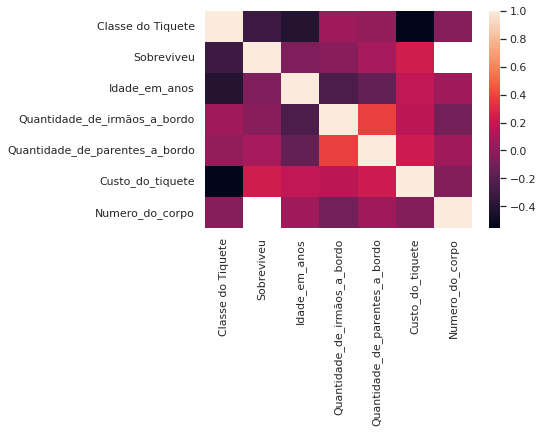

In [12]:
sns.heatmap(df.corr())
plt.show

### 03 - Estatistica descritiva

In [13]:
df.describe().round(2)

,Classe do Tiquete,Sobreviveu,Idade_em_anos,Quantidade_de_irmãos_a_bordo,Quantidade_de_parentes_a_bordo,Custo_do_tiquete,Numero_do_corpo
count,1309.00,1309.00,1046.00,1309.00,1309.00,1308.00,121.00
mean,2.29,0.38,29.88,0.50,0.39,33.30,160.81
std,0.84,0.49,14.41,1.04,0.87,51.76,97.70
min,1.00,0.00,0.17,0.00,0.00,0.00,1.00
25%,2.00,0.00,21.00,0.00,0.00,7.90,72.00
50%,3.00,0.00,28.00,0.00,0.00,14.45,155.00
75%,3.00,1.00,39.00,1.00,0.00,31.28,256.00
max,3.00,1.00,80.00,8.00,9.00,512.33,328.00


([], [])

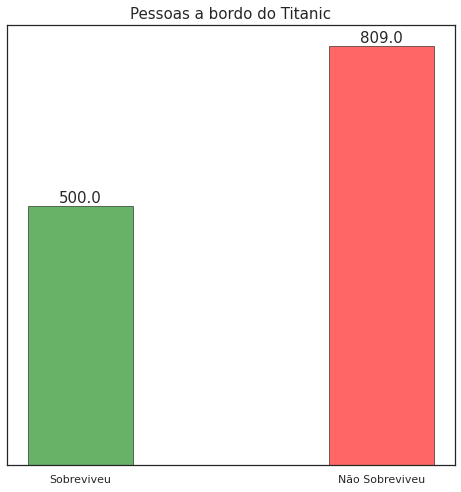

In [14]:
#Plot survived
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)
sns.set(style='white', palette='deep')
width = 0.35
ax.set_title('Pessoas a bordo do Titanic', fontsize = 15)
rects1= ax.bar('Sobreviveu', len(survived['Sobreviveu']), width,color='green', alpha=0.6, edgecolor='k', label='Sobreviveu')
rects2= ax.bar('Não Sobreviveu', len(not_survided['Sobreviveu']), width,color='red', alpha=0.6, edgecolor='k', label='Não Sobreviveu')
ax.bar_label(rects1, fmt="%.01f", size=15, label_type="edge")
ax.bar_label(rects2, fmt="%.01f", size=15, label_type="edge")
plt.tight_layout()
#remover eixo desnecessário
plt.yticks([])

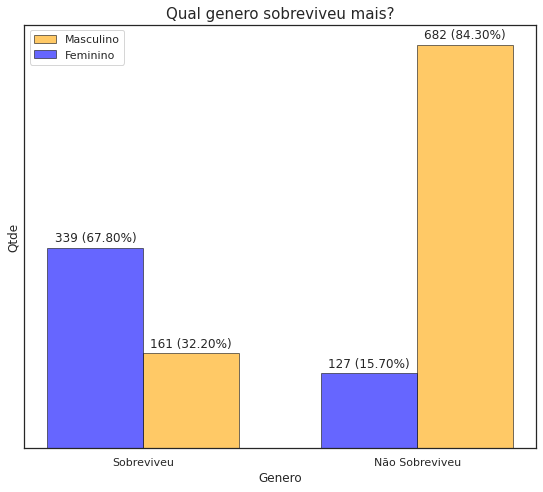

In [15]:
#Qual genero sobreviveu mais
survived_male = survived['Sobreviveu'][survived['Genero'] == 'male']
survived_female = survived['Sobreviveu'][survived['Genero'] == 'female']
not_survived_male = not_survided['Sobreviveu'][not_survided['Genero']=='male']
not_survived_female = not_survided['Sobreviveu'][not_survided['Genero']=='female']
label = ['Sobreviveu', 'Não Sobreviveu']
ind = np.arange(len(label))
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1,2,1)
rects3 = ax.bar(ind[0]+width/2,survived_male.shape[0],width, alpha=.6, color= 'orange', edgecolor='k', label='Masculino' )
rects4 = ax.bar(ind[0]-width/2, survived_female.shape[0],width, alpha=.6, color= 'blue', edgecolor='k', label='Feminino' )
rects5 = ax.bar(ind[1]+width/2, not_survived_male.shape[0], width, alpha=.6, edgecolor='k',  color='orange')
rects6 = ax.bar(ind[1]-width/2, not_survived_female.shape[0], width, alpha=.6, edgecolor='k', color='blue')
ax.set_xticks(ind)
ax.set_title('Qual genero sobreviveu mais?', fontsize = 15)
ax.set_xlabel('Genero')
ax.set_ylabel('Qtde')
ax.set_xticklabels(label)
ax.legend(loc='best')
autolabel(rects3, ax,survived)
autolabel(rects4, ax,survived)
autolabel(rects5, ax,not_survided)
autolabel(rects6, ax,not_survided)

#remover eixo desnecessário
plt.yticks([])

plt.tight_layout()


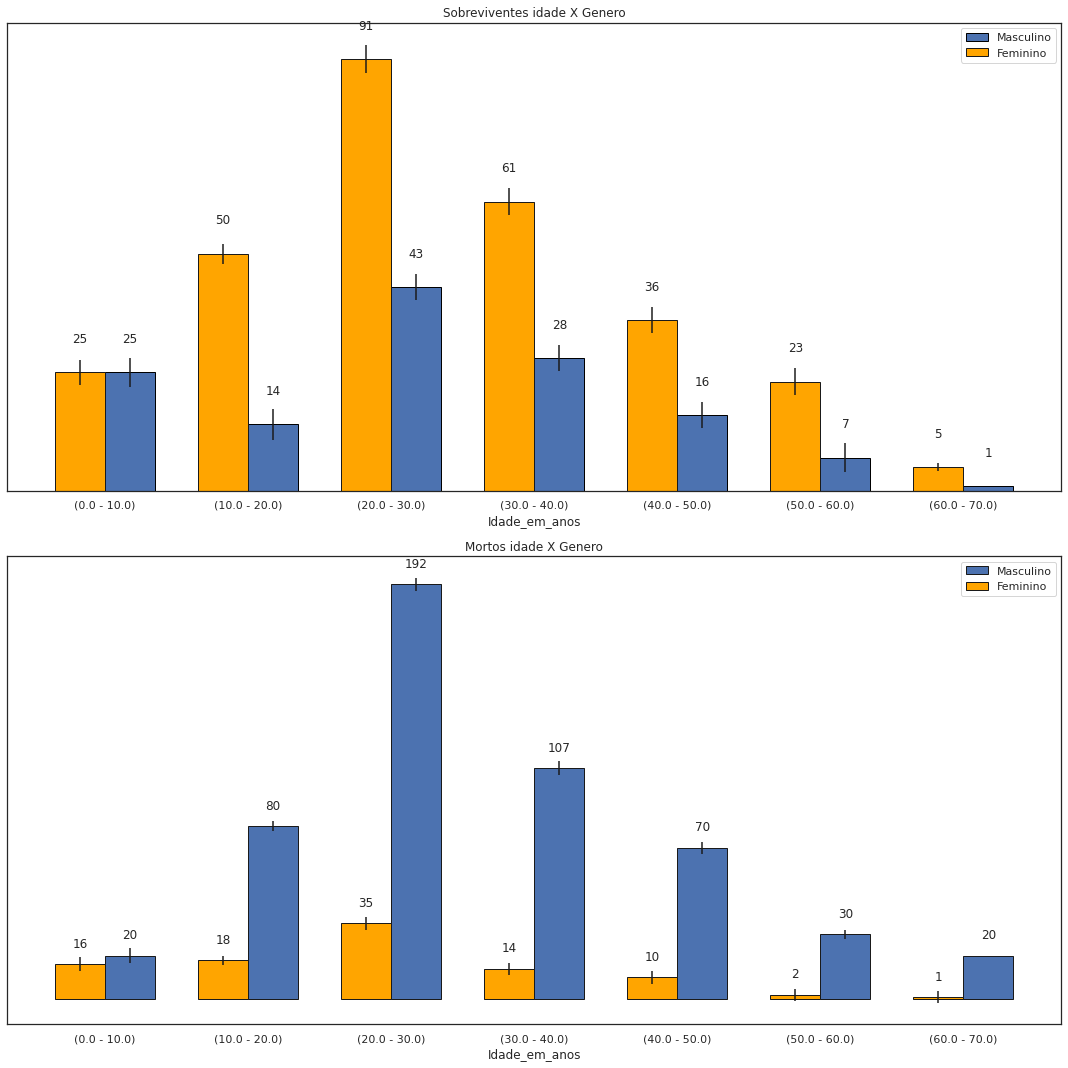

In [16]:
#plot age
bins = np.arange(min(df['Idade_em_anos']), max(df['Idade_em_anos']),10).round()
bins2 = bins.astype(str)
n = 0
m = 1
ranged = np.array([])
while m < 8:
    ranged = np.append(ranged, '('+bins2[n] + ' - ' + bins2[m]+')')
    n+=1
    m+=1
ranged
male_survived_age = survived.groupby(pd.cut(survived['Idade_em_anos'], bins))['Genero'].value_counts().values[1::2]
male_survived_std = survived.groupby([pd.cut(survived['Idade_em_anos'], bins), 'Genero'])['Idade_em_anos'].std().values[1::2]
male_survived_mean = survived.groupby([pd.cut(survived['Idade_em_anos'], bins), 'Genero'])['Idade_em_anos'].mean().values[1::2]
female_survived_age = survived.groupby(pd.cut(survived['Idade_em_anos'], bins))['Genero'].value_counts().values[::2]
female_survived_std = survived.groupby([pd.cut(survived['Idade_em_anos'], bins), 'Genero'])['Idade_em_anos'].std().values[::2]
female_survived_mean = survived.groupby([pd.cut(survived['Idade_em_anos'], bins), 'Genero'])['Idade_em_anos'].mean().values[::2]
male_not_survived_age = not_survided.groupby(pd.cut(not_survided['Idade_em_anos'], bins))['Genero'].value_counts().values[::2]
male_not_survived_std = not_survided.groupby([pd.cut(not_survided['Idade_em_anos'], bins), 'Genero'])['Idade_em_anos'].std().values[::2]
male_not_survived_mean = not_survided.groupby([pd.cut(not_survided['Idade_em_anos'], bins), 'Genero'])['Idade_em_anos'].mean().values[::2]
female_not_survived_age = not_survided.groupby(pd.cut(not_survided['Idade_em_anos'], bins))['Genero'].value_counts().values[1::2]
female_not_survived_std = not_survided.groupby([pd.cut(not_survided['Idade_em_anos'], bins), 'Genero'])['Idade_em_anos'].std().values[1::2]
female_not_survived_mean = not_survided.groupby([pd.cut(not_survided['Idade_em_anos'], bins), 'Genero'])['Idade_em_anos'].mean().values[1::2]
ind=np.arange(len(ranged))
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2,1,1)
rects7 = ax.bar(ind+width/2,male_survived_age,width, edgecolor='black', label='Masculino', yerr=male_survived_std)
rects8 = ax.bar(ind-width/2,female_survived_age,width,color='orange', edgecolor='k', label='Feminino', yerr=female_survived_std)
ax.set_title('Sobreviventes idade X Genero')
ax.set_xticks(ind)
ax.set_xlabel('Idade_em_anos')
ax.set_xticklabels(ranged)
ax.legend(loc='best')
#remover eixo desnecessário
plt.yticks([])

ax2 = fig.add_subplot(2,1,2)
rects9 = ax2.bar(ind+width/2,male_not_survived_age,width,edgecolor='k', label='Masculino', yerr=male_not_survived_std)
rects10 =ax2.bar(ind-width/2,female_not_survived_age,width,color='orange', edgecolor='k', label='Feminino', yerr=female_not_survived_std)
ax2.set_title('Mortos idade X Genero')
ax2.set_xticks(ind)
ax2.set_xlabel('Idade_em_anos')
ax2.set_xticklabels(ranged)
ax2.legend(loc='best')
autolabel_without_pct(rects7,ax, survived)
autolabel_without_pct(rects8,ax, survived)
autolabel_without_pct(rects9,ax2, not_survided)
autolabel_without_pct(rects10, ax2, not_survided)

#remover eixo desnecessário
plt.yticks([])

plt.tight_layout()

In [17]:
df.head()

,Classe do Tiquete,Sobreviveu,Nome,Genero,Idade_em_anos,Quantidade_de_irmãos_a_bordo,Quantidade_de_parentes_a_bordo,Número_do_tiquete,Custo_do_tiquete,Numero_da_cabine,Porto_de_embarque,Bote,Numero_do_corpo,Cidade_de_destino
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Haviam 582.00 familias no Titanic
A familia Sage foi a maior abordo do Titanic, com 11.00 familiares.


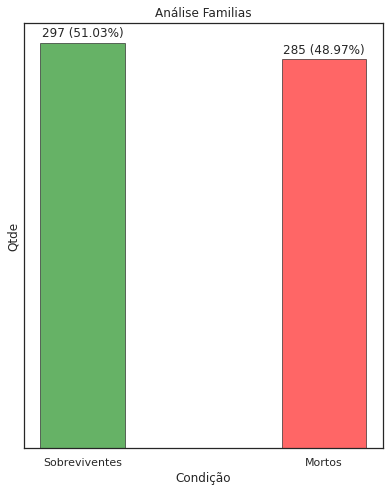

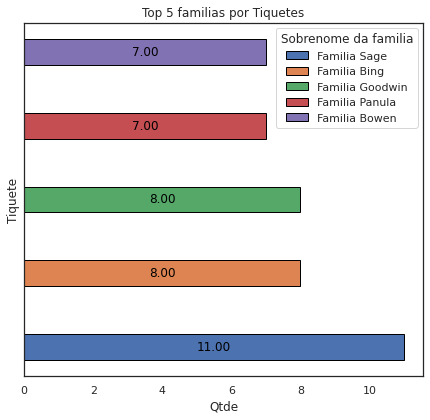

In [18]:
# Familia
from collections import Counter
c = Counter(df['Número_do_tiquete'])

ticket={}
for i in c:
    if c[i] > 1:
        ticket[i] = c[i]
tickets_names = [i for i in ticket]

df_family = pd.DataFrame()
df_family1 = pd.DataFrame()

for i in tickets_names:
    df_family1 = pd.DataFrame(df.loc[df['Número_do_tiquete']==i])
    df_family = pd.concat([df_family1,df_family])
print('Haviam {:.2f} familias no Titanic'.format(len(df_family))) 
df_family_survived = df_family[df_family['Sobreviveu']==1]
df_family_not_survived = df_family[df_family['Sobreviveu']==0]
fig= plt.figure(figsize=(6,7))
ax = fig.add_subplot(1,1,1)
ax.set_title('Análise Familias')
ax.set_ylabel('Qtde')
ax.set_xlabel('Condição')
rects11= ax.bar('Sobreviventes', len(df_family_survived), width,color='green', alpha=0.6, edgecolor='k', label='Sobreviventes')
rects12= ax.bar('Mortos', len(df_family_not_survived), width,color='red', alpha=0.6, edgecolor='k', label='Mortos')
autolabel(rects11,ax,df_family)
autolabel(rects12,ax,df_family)
plt.tight_layout()
#remover eixo desnecessário
plt.yticks([])



grouped_family = df_family.groupby('Número_do_tiquete')['Nome'].count().sort_values(ascending=False).head()
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(1,1,1)
for i in range(0,len(grouped_family)):
    last_name = df_family[df_family['Número_do_tiquete']==grouped_family.index[i]]['Nome'].values[0].split(',')[0]
    rects13=ax.barh(grouped_family.index[i],grouped_family.values[i], width,label='Familia '+last_name, edgecolor='black')
    autolabel_horizontal(rects13,ax)
ax.set_title("Top 5 familias por Tiquetes")
ax.legend(loc='best', title=("Sobrenome da familia"))
ax.set_xlabel('Qtde')
ax.set_ylabel("Tiquete")
plt.tight_layout()
#remover eixo desnecessário
plt.yticks([])


sage = df_family[df_family['Número_do_tiquete']==grouped_family.index[0]]['Nome'].values[0].split(',')[0]
print('A familia {} foi a maior abordo do Titanic, com {:.2f} familiares.'.format(sage,len(df_family[df_family['Número_do_tiquete']==grouped_family.index[0]]['Nome'])))

([], [])

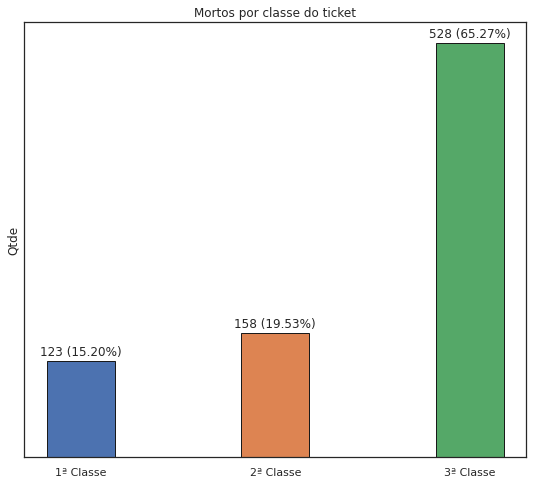

In [19]:
# Classes
class_1 = not_survided[not_survided['Classe do Tiquete'] ==1]
class_2 = not_survided[not_survided['Classe do Tiquete'] ==2]   
class_3 = not_survided[not_survided['Classe do Tiquete'] ==3]

fig= plt.figure(figsize=(9,8))
ax = fig.add_subplot(1,1,1) 
ax.set_title('Mortos por classe do ticket')
rects14 = ax.bar('1ª Classe', len(class_1['Classe do Tiquete']==1), width,edgecolor='k', label='01' )
rects15 = ax.bar('2ª Classe', len(class_2['Classe do Tiquete']==2), width,edgecolor='k', label='02' )
rects16 = ax.bar('3ª Classe', len(class_3['Classe do Tiquete']==3), width,edgecolor='k', label='03' )
ax.set_ylabel('Qtde')
autolabel(rects14,ax,not_survided)
autolabel(rects15,ax,not_survided)
autolabel(rects16,ax,not_survided)
#remover eixo desnecessário
plt.yticks([])

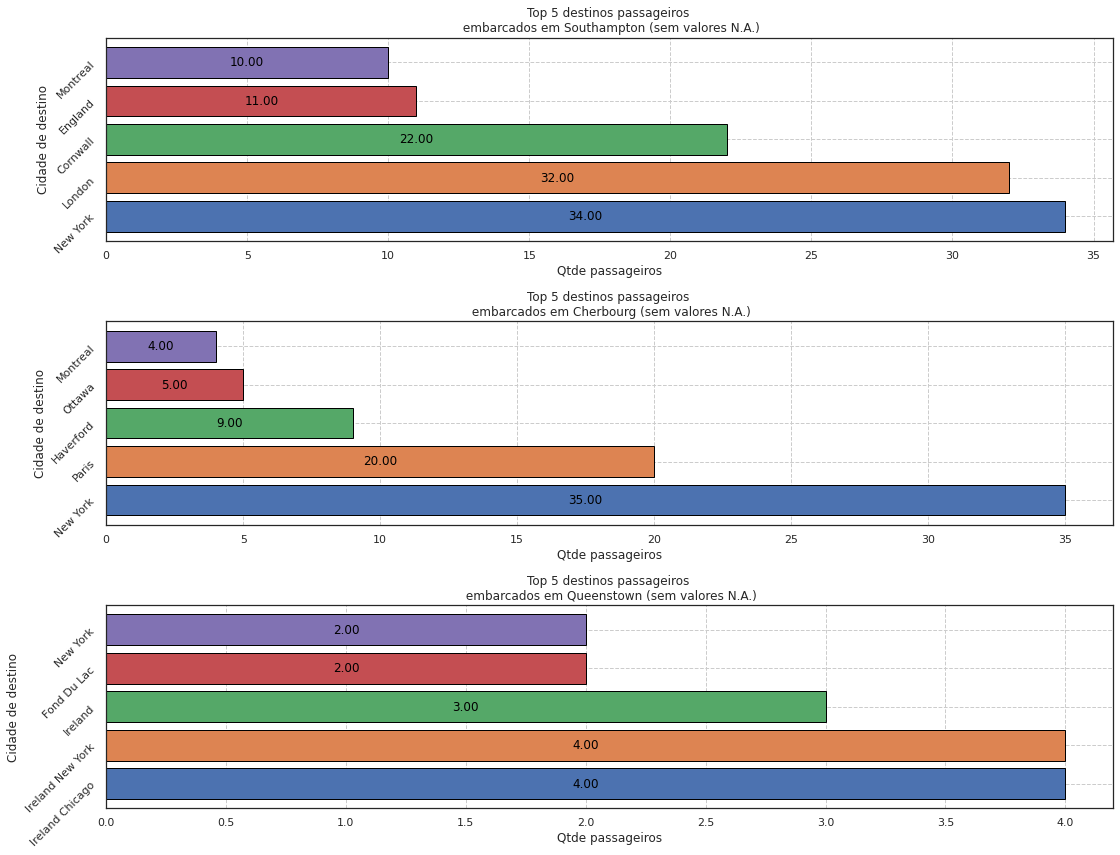

In [20]:
#Destino
import re
def clean_strings(strings):
    result = []
    for value in strings:
        value = value.strip()
        value = re.sub('[!#?/]', '', value)
        value = value.title()
        result.append(value)
    return result
destination = df.dropna(subset=['Cidade_de_destino'])
destination['Cidade_de_destino'] = destination['Cidade_de_destino'].apply(lambda x: x.split(',')[0])
destination['Cidade_de_destino'] = destination['Cidade_de_destino'].apply(lambda x: x.split('/')[0])
destination['Cidade_de_destino'] = clean_strings(destination['Cidade_de_destino'])
destination_southampton = destination[destination['Porto_de_embarque']=='S']   
destination_cherbourg = destination[destination['Porto_de_embarque']=='C']  
destination_queens = destination[destination['Porto_de_embarque']=='Q']
  
c_southampton = Counter(destination_southampton['Cidade_de_destino'])
c_cherbourg = Counter(destination_cherbourg['Cidade_de_destino'])
c_queens = Counter(destination_queens['Cidade_de_destino'])
c_southampton = {k: v for k, v in sorted(c_southampton.items(), key=lambda item: item[1], reverse=True)}
c_cherbourg = {k: v for k, v in sorted(c_cherbourg.items(), key=lambda item: item[1], reverse=True)}
c_queens = {k: v for k, v in sorted(c_queens.items(), key=lambda item: item[1],reverse=True)}
    
c_southampton_five = {}
c_cherbourg_five = {}
c_queens_five = {}    
count = 0
while count < 5:
    c_southampton_five[list(c_southampton.keys())[count]] = c_southampton[list(c_southampton.keys())[count]]
    c_cherbourg_five[list(c_cherbourg.keys())[count]] = c_cherbourg[list(c_cherbourg.keys())[count]]
    c_queens_five[list(c_queens.keys())[count]] = c_queens[list(c_queens.keys())[count]] 
    count+=1

fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.set_title('Top 5 destinos passageiros \n embarcados em Southampton (sem valores N.A.)')
ax2.set_title('Top 5 destinos passageiros \n embarcados em Cherbourg (sem valores N.A.)')
ax3.set_title('Top 5 destinos passageiros \n embarcados em Queenstown (sem valores N.A.)')
for i in range(0,len(c_southampton_five)):
    rects17 = ax1.barh(list(c_southampton_five.keys())[i], list(c_southampton_five.values())[i], edgecolor='black')
    rects18 = ax2.barh(list(c_cherbourg_five.keys())[i], list(c_cherbourg_five.values())[i], edgecolor='black')
    rects19 = ax3.barh(list(c_queens_five.keys())[i], list(c_queens_five.values())[i], edgecolor='black')
    ax1.grid(b=True, which='major', linestyle='--')
    ax2.grid(b=True, which='major', linestyle='--')
    ax3.grid(b=True, which='major', linestyle='--')
    ax1.set_xlabel('Qtde passageiros')
    ax2.set_xlabel('Qtde passageiros')
    ax3.set_xlabel('Qtde passageiros')
    ax1.set_ylabel('Cidade de destino')
    ax2.set_ylabel('Cidade de destino')
    ax3.set_ylabel('Cidade de destino')    
    autolabel_horizontal(rects17,ax1)
    autolabel_horizontal(rects18,ax2)
    autolabel_horizontal(rects19,ax3)
    plt.tight_layout()
for tick in ax1.get_yticklabels():
    tick.set_rotation(45)
for tick in ax2.get_yticklabels():
    tick.set_rotation(45)
for tick in ax3.get_yticklabels():
    tick.set_rotation(45)

In [21]:
letters = np.array([])
embarked = ['Cherbourg', 'Queenstown', 'Southampton']
for i in df['Porto_de_embarque']:
    if i == 'S':
        letters = np.append(letters, embarked[2])
    elif i == 'C':
        letters = np.append(letters, embarked[0])
    else:
        letters= np.append(letters, embarked[1])

df['Porto_de_embarque'] = letters      

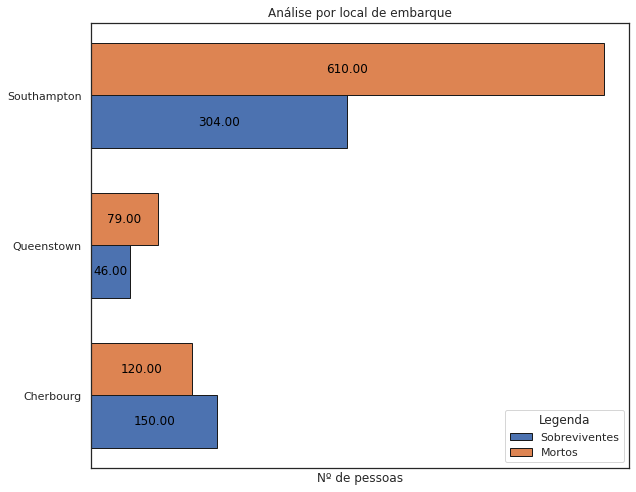

In [22]:
labels = ['Cherbourg','Queenstown', 'Southampton']
destination_survived = np.array([])
destination_not_survived = np.array([])
for i in labels:
    survived_list = len(df[(df['Sobreviveu']==1)][df['Porto_de_embarque']==i]['Sobreviveu'])
    not_survived_list = len(df[(df['Sobreviveu']==0)][df['Porto_de_embarque']==i]['Sobreviveu'])
    destination_survived = np.append(destination_survived,survived_list)
    destination_not_survived = np.append(destination_not_survived,not_survived_list)
ind = np.arange(len(labels))
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(1,1,1)
rects20 = ax.barh(ind-width/2, destination_survived, width, edgecolor='k',align='center', label='Sobreviventes')
rects21 = ax.barh(ind+width/2, destination_not_survived, width, edgecolor='k', align='center', label='Mortos')
ax.legend(loc='best', title='Legenda')
ax.set_yticks(ind)
ax.set_yticklabels(labels)
ax.set_xlabel('Nº de pessoas')
ax.set_title('Análise por local de embarque')
autolabel_horizontal(rects20,ax)
autolabel_horizontal(rects21,ax)
#remover eixo desnecessário
plt.xticks([])
plt.tight_layout()

# Feature Engineering

In [23]:
df.head()

,Classe do Tiquete,Sobreviveu,Nome,Genero,Idade_em_anos,Quantidade_de_irmãos_a_bordo,Quantidade_de_parentes_a_bordo,Número_do_tiquete,Custo_do_tiquete,Numero_da_cabine,Porto_de_embarque,Bote,Numero_do_corpo,Cidade_de_destino
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,Southampton,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [24]:
df_feature = df.copy()
describe = df_feature.describe()
info = df_feature.info()
df_feature = df_feature.drop(['Numero_da_cabine','Bote', 'Numero_do_corpo', 'Cidade_de_destino'], axis=1)
    
list_family = np.array([])
for i in df_feature['Número_do_tiquete']:
    for j in c:
        if i == j:
            list_family = np.append(list_family, c[j])
            
df_feature['familia']=list_family  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Classe do Tiquete               1309 non-null   int64  
 1   Sobreviveu                      1309 non-null   int64  
 2   Nome                            1309 non-null   object 
 3   Genero                          1309 non-null   object 
 4   Idade_em_anos                   1046 non-null   float64
 5   Quantidade_de_irmãos_a_bordo    1309 non-null   int64  
 6   Quantidade_de_parentes_a_bordo  1309 non-null   int64  
 7   Número_do_tiquete               1309 non-null   object 
 8   Custo_do_tiquete                1308 non-null   float64
 9   Numero_da_cabine                295 non-null    object 
 10  Porto_de_embarque               1309 non-null   object 
 11  Bote                            486 non-null    object 
 12  Numero_do_corpo                 12

# Procurando valores nulos

In [25]:
df_feature.isnull().sum() #first way
df_feature.isnull().any() #second way
df_feature.isna().sum() #third way
null_percentage = (df_feature.isnull().sum()/len(df_feature)*100)
null_percentage = pd.DataFrame(null_percentage, columns=['% Null Values'])
null_percentage

,% Null Values
Classe do Tiquete,0.000000
Sobreviveu,0.000000
Nome,0.000000
Genero,0.000000
Idade_em_anos,20.091673
Quantidade_de_irmãos_a_bordo,0.000000
Quantidade_de_parentes_a_bordo,0.000000
Número_do_tiquete,0.000000
Custo_do_tiquete,0.076394
Porto_de_embarque,0.000000


In [26]:
#substituindo os valores nulos da idade pela média das idades
#substituindo os valores nulos do custo do tiquete pela ultima observação válida
df_feature['Idade_em_anos'].fillna(df_feature['Idade_em_anos'].mean(), inplace=True)
df_feature['Custo_do_tiquete'].fillna(method='ffill', inplace=True)

# Definindo X e Y

In [27]:
X = df_feature.drop(['Sobreviveu', 'Nome', 'Número_do_tiquete'], axis=1)
y = df_feature['Sobreviveu']

In [28]:
X

,Classe do Tiquete,Genero,Idade_em_anos,Quantidade_de_irmãos_a_bordo,Quantidade_de_parentes_a_bordo,Custo_do_tiquete,Porto_de_embarque,familia
0,1,female,29.000000,0,0,211.3375,Southampton,1.0
1,1,male,0.916700,1,2,151.5500,Southampton,6.0
2,1,female,2.000000,1,2,151.5500,Southampton,6.0
3,1,male,30.000000,1,2,151.5500,Southampton,6.0
4,1,female,25.000000,1,2,151.5500,Southampton,6.0
...,...,...,...,...,...,...,...,...
1304,3,female,14.500000,1,0,14.4542,Cherbourg,2.0
1305,3,female,29.881135,1,0,14.4542,Cherbourg,2.0
1306,3,male,26.500000,0,0,7.2250,Cherbourg,1.0
1307,3,male,27.000000,0,0,7.2250,Cherbourg,1.0


# Get Dummies
Convertendo as variaveis categóricas em variaveis numéricas


In [29]:
X = pd.get_dummies(X)
X

,Classe do Tiquete,Idade_em_anos,Quantidade_de_irmãos_a_bordo,Quantidade_de_parentes_a_bordo,Custo_do_tiquete,familia,Genero_female,Genero_male,Porto_de_embarque_Cherbourg,Porto_de_embarque_Queenstown,Porto_de_embarque_Southampton
0,1,29.000000,0,0,211.3375,1.0,1,0,0,0,1
1,1,0.916700,1,2,151.5500,6.0,0,1,0,0,1
2,1,2.000000,1,2,151.5500,6.0,1,0,0,0,1
3,1,30.000000,1,2,151.5500,6.0,0,1,0,0,1
4,1,25.000000,1,2,151.5500,6.0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,14.500000,1,0,14.4542,2.0,1,0,1,0,0
1305,3,29.881135,1,0,14.4542,2.0,1,0,1,0,0
1306,3,26.500000,0,0,7.2250,1.0,0,1,1,0,0
1307,3,27.000000,0,0,7.2250,1.0,0,1,1,0,0


# Dummies Trap (Variáveis altamente relacionadas)
Retirando do modelo duas variáveis altamente relacionadas, que poderiam atrapalhar na análise.
Uma vez que em Southampton houve um embarque de muitos individuos do genêro masculino.


In [30]:
X.columns
X = X.drop(['Genero_male', 'Porto_de_embarque_Southampton'], axis= 1)

In [31]:
X

,Classe do Tiquete,Idade_em_anos,Quantidade_de_irmãos_a_bordo,Quantidade_de_parentes_a_bordo,Custo_do_tiquete,familia,Genero_female,Porto_de_embarque_Cherbourg,Porto_de_embarque_Queenstown
0,1,29.000000,0,0,211.3375,1.0,1,0,0
1,1,0.916700,1,2,151.5500,6.0,0,0,0
2,1,2.000000,1,2,151.5500,6.0,1,0,0
3,1,30.000000,1,2,151.5500,6.0,0,0,0
4,1,25.000000,1,2,151.5500,6.0,1,0,0
...,...,...,...,...,...,...,...,...,...
1304,3,14.500000,1,0,14.4542,2.0,1,1,0
1305,3,29.881135,1,0,14.4542,2.0,1,1,0
1306,3,26.500000,0,0,7.2250,1.0,0,1,0
1307,3,27.000000,0,0,7.2250,1.0,0,1,0


# Dividindo o conjunto de dados em conjunto de treinamento e conjunto de teste

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(262,)

# Dimensionamento de recursos

StandardScaler que implementa a TransformerAPI para calcular a média e o desvio padrão em um conjunto de treinamento, de modo a poder reaplicar posteriormente a mesma transformação no conjunto de teste. Portanto, esta classe é adequada para uso nas etapas iniciais de um sklearn.pipeline.Pipeline você pode ler toda a documentaçâo dessa biblioteca neste site: https://scikit-learn.org/stable/modules/preprocessing.html

In [33]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = pd.DataFrame(sc_x.fit_transform(X_train), columns=X.columns.values)
X_test = pd.DataFrame(sc_x.transform(X_test), columns=X.columns.values)

# Construindo Modelo 
### Comparando modelos

In [34]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state = 0, penalty = 'l2')
lr_classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = lr_classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression (Lasso)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

0.19181835975729106


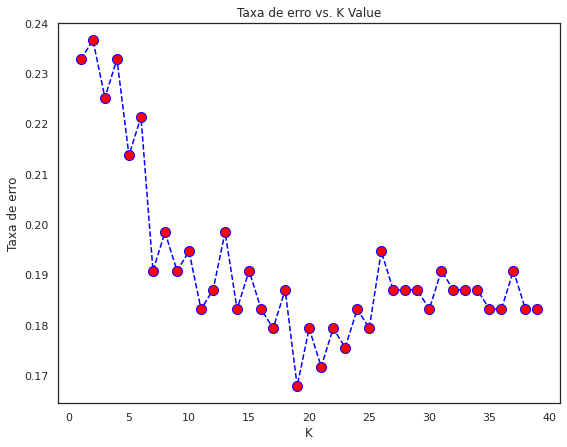

In [35]:
## K-Nearest Neighbors (K-NN)
#Escolhenro o K value
error_rate= []
for i in range(1,40):
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(9,7))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Taxa de erro vs. K Value')
plt.xlabel('K')
plt.ylabel('Taxa de erro')
print(np.mean(error_rate))

In [36]:
from sklearn.neighbors import KNeighborsClassifier
kn_classifier = KNeighborsClassifier(n_neighbors=19, metric='minkowski', p= 2)
kn_classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = kn_classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['K-Nearest Neighbors (minkowski)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [37]:
## SVM (Linear)
from sklearn.svm import SVC
svm_linear_classifier = SVC(random_state = 0, kernel = 'linear', probability= True)
svm_linear_classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = svm_linear_classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [38]:
## SVM (rbf)
from sklearn.svm import SVC
svm_rbf_classifier = SVC(random_state = 0, kernel = 'rbf', probability= True)
svm_rbf_classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = svm_rbf_classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (RBF)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [39]:
## Naive Bayes
from sklearn.naive_bayes import GaussianNB
gb_classifier = GaussianNB()
gb_classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = gb_classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Naive Bayes (Gaussian)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [40]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_classifier.fit(X_train, y_train)

#Predicting the best set result
y_pred = dt_classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [41]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'gini')
rf_classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = rf_classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest Gini (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [42]:
## Ada Boosting
from sklearn.ensemble import AdaBoostClassifier
ad_classifier = AdaBoostClassifier()
ad_classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = ad_classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Ada Boosting', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [43]:
##Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gr_classifier = GradientBoostingClassifier()
gr_classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = gr_classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Gradient Boosting', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [44]:
##Xg Boosting
from xgboost import XGBClassifier
xg_classifier = XGBClassifier()
xg_classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = xg_classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Xg Boosting', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [45]:
##Ensemble Voting Classifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
voting_classifier = VotingClassifier(estimators= [('lr', lr_classifier),
                                                  ('kn', kn_classifier),
                                                  ('svc_linear', svm_linear_classifier),
                                                  ('svc_rbf', svm_rbf_classifier),
                                                  ('gb', gb_classifier),
                                                  ('dt', dt_classifier),
                                                  ('rf', rf_classifier),
                                                  ('ad', ad_classifier),
                                                  ('gr', gr_classifier),
                                                  ('xg', xg_classifier),],
voting='soft')

for clf in (lr_classifier,kn_classifier,svm_linear_classifier,svm_rbf_classifier,
            gb_classifier, dt_classifier,rf_classifier, ad_classifier, gr_classifier, xg_classifier,
            voting_classifier):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

# Predicting Test Set
y_pred = voting_classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Ensemble Voting', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)   

LogisticRegression 0.8015267175572519
KNeighborsClassifier 0.8320610687022901
SVC 0.7977099236641222
SVC 0.8206106870229007
GaussianNB 0.7938931297709924
DecisionTreeClassifier 0.767175572519084
RandomForestClassifier 0.8129770992366412
AdaBoostClassifier 0.8244274809160306
GradientBoostingClassifier 0.8053435114503816
XGBClassifier 0.7938931297709924
VotingClassifier 0.816793893129771


In [46]:
#O melhor classificador
print('The best classifier is:')
print('{}'.format(results.sort_values(by='Accuracy',ascending=False)))

The best classifier is:
                              Model  Accuracy  Precision  Recall  F1 Score
1   K-Nearest Neighbors (minkowski)  0.832061   0.878378    0.65  0.747126
7                      Ada Boosting  0.824427   0.800000    0.72  0.757895
3                         SVM (RBF)  0.820611   0.827160    0.67  0.740331
10                  Ensemble Voting  0.816794   0.825000    0.66  0.733333
6        Random Forest Gini (n=100)  0.812977   0.807229    0.67  0.732240
8                 Gradient Boosting  0.805344   0.818182    0.63  0.711864
0       Logistic Regression (Lasso)  0.801527   0.772727    0.68  0.723404
2                      SVM (Linear)  0.797710   0.770115    0.67  0.716578
4            Naive Bayes (Gaussian)  0.793893   0.755556    0.68  0.715789
9                       Xg Boosting  0.793893   0.767442    0.66  0.709677
5                     Decision Tree  0.767176   0.714286    0.65  0.680628


# Applying K-fold validação para a melhor classificação
##### Validação cruzada

In [47]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=kn_classifier, X=X_train, y=y_train,cv=10)
accuracies.mean()
accuracies.std()
print(" K-Nearest Neighbors (minkowski) Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

 K-Nearest Neighbors (minkowski) Accuracy: 0.807 (+/- 0.061)


# Traçando Perfil de Precisão Cumulativa (CAP)

      0         1
0   1.0  1.000000
1   1.0  1.000000
2   1.0  1.000000
3   1.0  1.000000
4   1.0  1.000000
5   1.0  1.000000
6   1.0  1.000000
7   1.0  1.000000
8   1.0  0.947368
9   1.0  0.947368
10  1.0  0.947368
11  1.0  0.947368
12  1.0  0.947368
13  1.0  0.947368
14  1.0  0.947368
15  1.0  0.947368
16  1.0  0.947368
17  1.0  0.894737
18  1.0  0.894737
19  1.0  0.894737


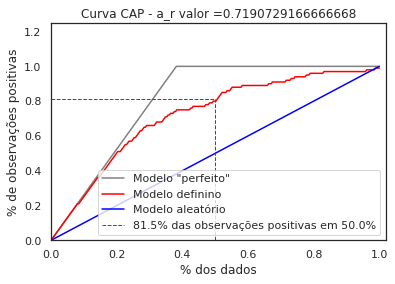

In [48]:
y_pred_proba = kn_classifier.predict_proba(X=X_test)
import matplotlib.pyplot as plt
from scipy import integrate
def capcurve(y_values, y_preds_proba):
    num_pos_obs = np.sum(y_values)
    num_count = len(y_values)
    rate_pos_obs = float(num_pos_obs) / float(num_count)
    ideal = pd.DataFrame({'x':[0,rate_pos_obs,1],'y':[0,1,1]})
    xx = np.arange(num_count) / float(num_count - 1)
    
    y_cap = np.c_[y_values,y_preds_proba]
    y_cap_df_s = pd.DataFrame(data=y_cap)
    y_cap_df_s = y_cap_df_s.sort_values([1], ascending=False).reset_index(level = y_cap_df_s.index.names, drop=True)
    
    print(y_cap_df_s.head(20))
    
    yy = np.cumsum(y_cap_df_s[0]) / float(num_pos_obs)
    yy = np.append([0], yy[0:num_count-1]) #add the first curve point (0,0) : for xx=0 we have yy=0
    
    percent = 0.5
    row_index = int(np.trunc(num_count * percent))
    
    val_y1 = yy[row_index]
    val_y2 = yy[row_index+1]
    if val_y1 == val_y2:
        val = val_y1*1.0
    else:
        val_x1 = xx[row_index]
        val_x2 = xx[row_index+1]
        val = val_y1 + ((val_x2 - percent)/(val_x2 - val_x1))*(val_y2 - val_y1)
    
    sigma_ideal = 1 * xx[num_pos_obs - 1 ] / 2 + (xx[num_count - 1] - xx[num_pos_obs]) * 1
    sigma_model = integrate.simps(yy,xx)
    sigma_random = integrate.simps(xx,xx)
    
    ar_value = (sigma_model - sigma_random) / (sigma_ideal - sigma_random)
    
    fig, ax = plt.subplots(nrows = 1, ncols = 1)
    ax.plot(ideal['x'],ideal['y'], color='grey', label='Modelo "perfeito"')
    ax.plot(xx,yy, color='red', label='Modelo definino')
    ax.plot(xx,xx, color='blue', label='Modelo aleatório')
    ax.plot([percent, percent], [0.0, val], color='green', linestyle='--', linewidth=1)
    ax.plot([0, percent], [val, val], color='green', linestyle='--', linewidth=1, label=str(val*100)+'% das observações positivas em '+str(percent*100)+'%')
    
    plt.xlim(0, 1.02)
    plt.ylim(0, 1.25)
    plt.title("Curva CAP - a_r valor ="+str(ar_value))
    plt.xlabel('% dos dados')
    plt.ylabel('% de observações positivas')
    plt.legend()
    
capcurve(y_test,y_pred_proba[:,1])

In [49]:
#ELI5 é um pacote Python que ajuda a depurar classificadores de aprendizado de máquina e explicar suas previsões.

import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(kn_classifier, random_state=0).fit(X_test,y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1947 ± 0.0255,Genero_female
0.0328 ± 0.0249,Classe do Tiquete
0.0229 ± 0.0145,Custo_do_tiquete
0.0221 ± 0.0089,Quantidade_de_irmãos_a_bordo
0.0145 ± 0.0122,Porto_de_embarque_Cherbourg
0.0130 ± 0.0197,Idade_em_anos
0.0099 ± 0.0104,Porto_de_embarque_Queenstown
0.0092 ± 0.0157,familia
0.0084 ± 0.0163,Quantidade_de_parentes_a_bordo
